In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime

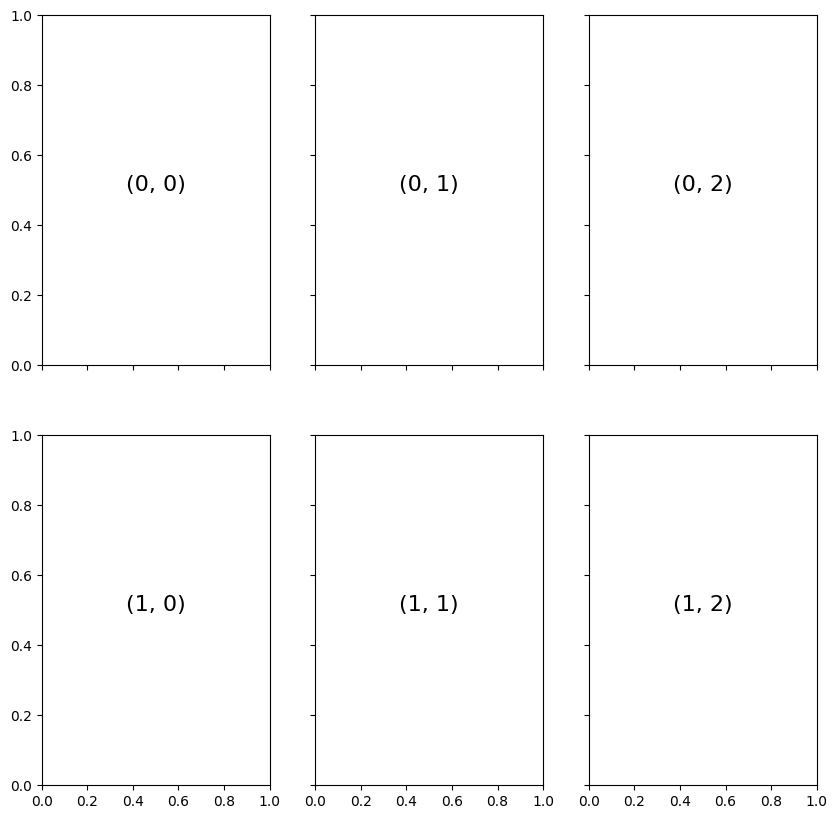

In [2]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(10, 10))

for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=16, ha='center')

<Axes: >

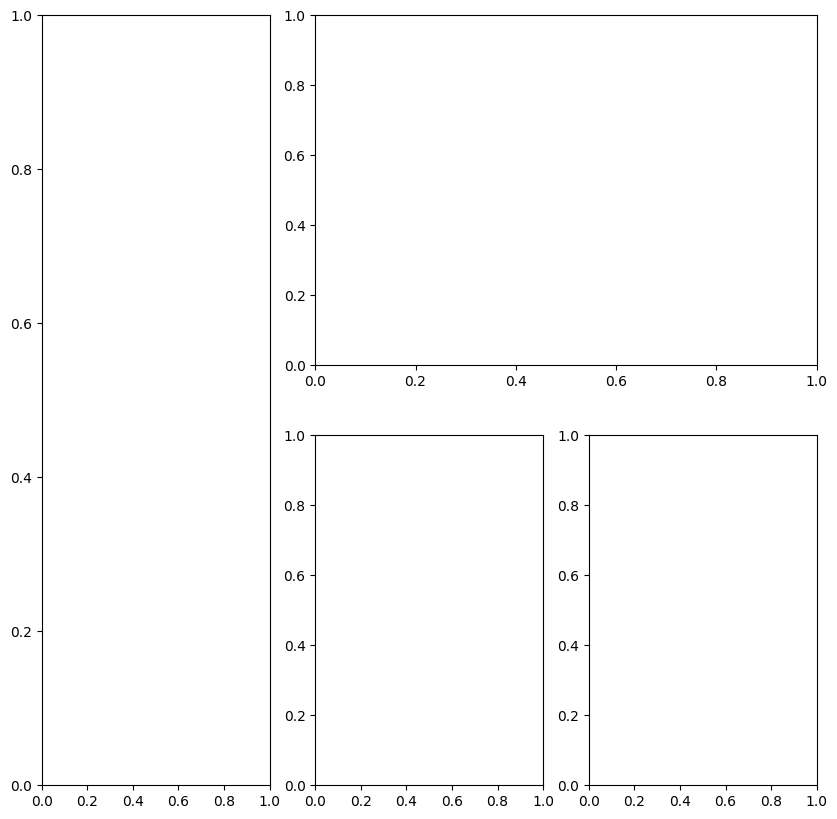

In [3]:
grid = plt.GridSpec(2, 3)
plt.figure(figsize=(10, 10))
plt.subplot(grid[:2, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, 2])
plt.subplot(grid[1, 1])

(array([  2.,   1.,   3.,   4.,   8.,  11.,  15.,  17.,  29.,  47.,  66.,
         92., 117., 155., 169., 203., 203., 227., 230., 208., 234., 214.,
        173., 125., 117., 107.,  70.,  50.,  27.,  30.,  22.,  10.,   6.,
          3.,   0.,   3.,   1.,   0.,   0.,   1.]),
 array([-3.52331458, -3.33349367, -3.14367275, -2.95385184, -2.76403093,
        -2.57421002, -2.38438911, -2.19456819, -2.00474728, -1.81492637,
        -1.62510546, -1.43528454, -1.24546363, -1.05564272, -0.86582181,
        -0.6760009 , -0.48617998, -0.29635907, -0.10653816,  0.08328275,
         0.27310367,  0.46292458,  0.65274549,  0.8425664 ,  1.03238731,
         1.22220823,  1.41202914,  1.60185005,  1.79167096,  1.98149188,
         2.17131279,  2.3611337 ,  2.55095461,  2.74077552,  2.93059644,
         3.12041735,  3.31023826,  3.50005917,  3.68988009,  3.879701  ,
         4.06952191]),
 [<matplotlib.patches.Polygon at 0x211e66819a0>])

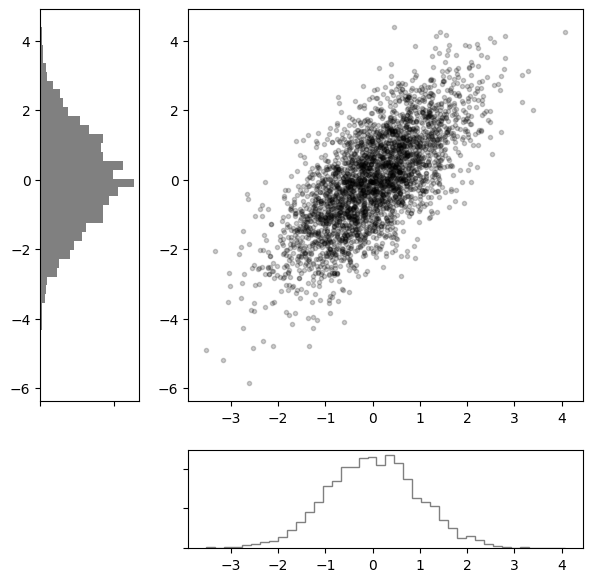

In [4]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]

rng = np.random.default_rng(1)
x, y = rng.multivariate_normal(mean, cov, 3000).T

fig = plt.figure(figsize=(7, 7))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.5)

main_ax = fig.add_subplot(grid[:-1, 1:])

y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)

x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

y_hist.hist(y, 40, orientation='horizontal', color='gray', histtype='stepfilled')
x_hist.hist(x, 40, orientation='vertical', color='gray', histtype='step')

Поясняющие надписи

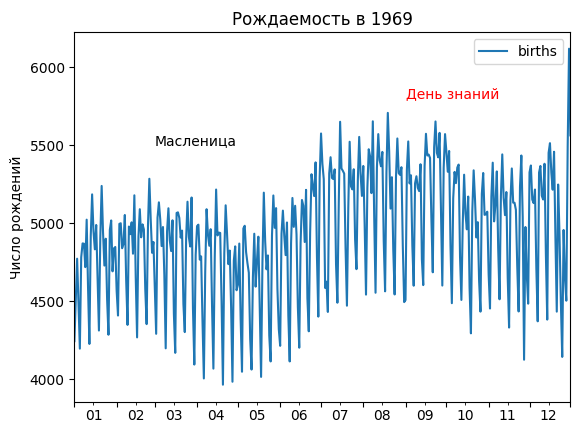

In [5]:
births = pd.read_csv('./data/births-1969.csv')

""" births['day'] = births['day'].astype(int) """

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

""" print(births.head()) """

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

""" print(births_by_date.head()) """

births_by_date.index = [
    datetime(1969, month, day) for (month, day) in births_by_date.index
]

""" print(births_by_date.head()) """

fig, ax = plt.subplots()
births_by_date.plot(ax=ax)

style = dict(size=10, color='red')
ax.text('1969-09-01', 5800, "День знаний", **style)
ax.text('1969-03-01', 5500, "Масленица", ha='left')

ax.set(title="Рождаемость в 1969", ylabel="Число рождений")

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%m'))
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))

Text(0.15, 0.4, 'Data6 (0.2, 0.2)')

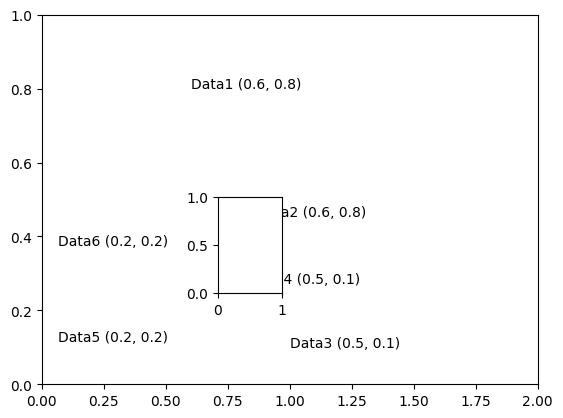

In [6]:
fig = plt.figure()
ax1 = plt.axes()

ax2 = plt.axes([0.4, 0.3, 0.1, 0.2])

ax1.set_xlim(0, 2)
ax1.text(0.6, 0.8, 'Data1 (0.6, 0.8)', transform=ax1.transData)
ax1.text(0.6, 0.8, 'Data2 (0.6, 0.8)', transform=ax2.transData)

ax1.text(0.5, 0.1, "Data3 (0.5, 0.1)", transform=ax1.transAxes)
ax1.text(0.5, 0.1, "Data4 (0.5, 0.1)", transform=ax2.transAxes)

ax1.text(0.15, 0.2, "Data5 (0.2, 0.2)", transform=fig.transFigure)
ax1.text(0.15, 0.4, "Data6 (0.2, 0.2)", transform=fig.transFigure)

Text(13.14, -4, 'Локальный минимум')

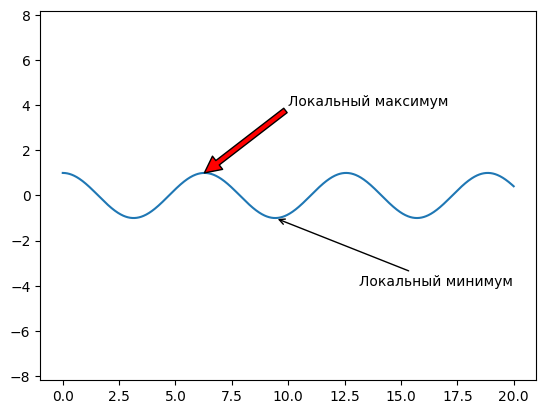

In [7]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('Локальный максимум', xy = (6.28, 1), xytext=(10,4),arrowprops=dict(facecolor='red'))
ax.annotate('Локальный минимум', xy = (9.42, -1), xytext=(13.14,-4),arrowprops=dict(facecolor='red', arrowstyle='->'))

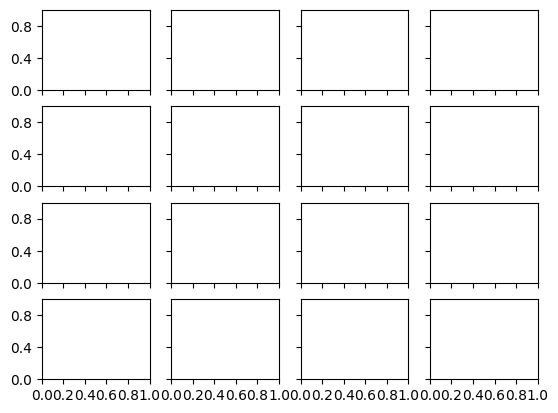

In [8]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

(array([  3.,  21.,  76., 168., 230., 237., 164.,  72.,  24.,   5.]),
 array([-3.33367481, -2.6728114 , -2.01194799, -1.35108458, -0.69022117,
        -0.02935776,  0.63150565,  1.29236906,  1.95323247,  2.61409588,
         3.27495929]),
 <BarContainer object of 10 artists>)

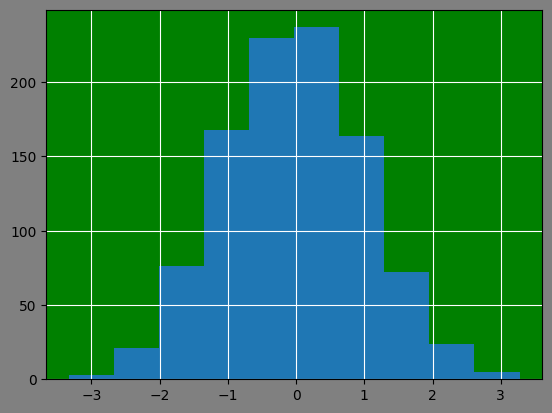

In [9]:
x = np.random.randn(1000)

fig = plt.figure(facecolor='gray')
ax = plt.axes(facecolor='green')

plt.grid(color='w', linestyle='solid')

plt.hist(x)